# <center>YZV 211 Project - Team D&S</center>

Prepared by:
- Hakan Erdem - 150200313
- Doruk Üzgün - 150200311

# Loading Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\erdem\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
depression_gender = pd.read_csv("prevalence-of-depression-males-vs-females.csv")
depression_age = pd.read_csv("prevalence-of-depression-by-age.csv")
anxiety = pd.read_csv("prevalence-of-anxiety-disorders-males-vs-females.csv")
schizophrenia = pd.read_csv("prevalence-of-schizophrenia-in-males-vs-females.csv")
bipolar = pd.read_csv("prevalence-of-bipolar-disorder-in-males-vs-females.csv")
suicide = pd.read_csv("suicide-rates-vs-prevalence-of-depression.csv")

# EDA

In [4]:
df = depression_gender.merge(right=anxiety,on=["Entity","Code","Year", "Population (historical estimates)","Continent"])
for i in [schizophrenia,bipolar]:
    df = df.merge(right=i, on=["Entity","Code","Year", "Population (historical estimates)","Continent"])

In [5]:
df = df.dropna(subset=["Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"]).reset_index()
del df["index"]
df = df.drop(columns=["Continent","Code"])

#### First look to the data

In [6]:
df

,Entity,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent),Prevalence - Schizophrenia - Sex: Male - Age: Age-standardized (Percent),Prevalence - Schizophrenia - Sex: Female - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)
0,Afghanistan,1990,4.29,5.86,10694804.0,3.56,5.97,0.24,0.22,0.68,0.76
1,Afghanistan,1991,4.29,5.85,10745168.0,3.55,5.98,0.24,0.22,0.67,0.76
2,Afghanistan,1992,4.30,5.85,12057436.0,3.54,5.99,0.24,0.21,0.67,0.76
3,Afghanistan,1993,4.30,5.84,14003764.0,3.54,5.99,0.24,0.21,0.67,0.76
4,Afghanistan,1994,4.31,5.84,15455560.0,3.54,6.00,0.24,0.21,0.67,0.76
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,3.09,3.93,14154937.0,3.05,3.53,0.22,0.20,0.57,0.56
6836,Zimbabwe,2016,3.09,3.94,14452705.0,3.05,3.55,0.22,0.20,0.57,0.56
6837,Zimbabwe,2017,3.10,3.95,14751101.0,3.04,3.56,0.22,0.20,0.57,0.56
6838,Zimbabwe,2018,3.09,3.95,15052191.0,3.04,3.54,0.22,0.20,0.57,0.56


In [7]:
df.columns[2:]

Index(['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Population (historical estimates)',
       'Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Prevalence - Schizophrenia - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Schizophrenia - Sex: Female - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)'],
      dtype='object')

In [8]:
rename_dict = {'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)':'Male Depression (%)',
          'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)':'Female Depression (%)',
          'Population (historical estimates)':"Population",
          'Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)':'Male Anxiety (%)',
          'Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)':'Female Anxiety (%)',
          'Prevalence - Schizophrenia - Sex: Male - Age: Age-standardized (Percent)':'Male Schizophrenia (%)',
          'Prevalence - Schizophrenia - Sex: Female - Age: Age-standardized (Percent)':'Female Schizophrenia (%)',
          'Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent)':'Male Bipolar (%)',
          'Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)':'Female Bipolar (%)'}

In [9]:
df = df.rename(columns=rename_dict)
# rearranging the columns
df = df.iloc[:, [0,1,2,3,5,6,7,8,9,10,4]]

### Final Look of the Dataset

In [10]:
df

,Entity,Year,Male Depression (%),Female Depression (%),Male Anxiety (%),Female Anxiety (%),Male Schizophrenia (%),Female Schizophrenia (%),Male Bipolar (%),Female Bipolar (%),Population
0,Afghanistan,1990,4.29,5.86,3.56,5.97,0.24,0.22,0.68,0.76,10694804.0
1,Afghanistan,1991,4.29,5.85,3.55,5.98,0.24,0.22,0.67,0.76,10745168.0
2,Afghanistan,1992,4.30,5.85,3.54,5.99,0.24,0.21,0.67,0.76,12057436.0
3,Afghanistan,1993,4.30,5.84,3.54,5.99,0.24,0.21,0.67,0.76,14003764.0
4,Afghanistan,1994,4.31,5.84,3.54,6.00,0.24,0.21,0.67,0.76,15455560.0
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,3.09,3.93,3.05,3.53,0.22,0.20,0.57,0.56,14154937.0
6836,Zimbabwe,2016,3.09,3.94,3.05,3.55,0.22,0.20,0.57,0.56,14452705.0
6837,Zimbabwe,2017,3.10,3.95,3.04,3.56,0.22,0.20,0.57,0.56,14751101.0
6838,Zimbabwe,2018,3.09,3.95,3.04,3.54,0.22,0.20,0.57,0.56,15052191.0


In [11]:
df.groupby("Entity").mean()

,Year,Male Depression (%),Female Depression (%),Male Anxiety (%),Female Anxiety (%),Male Schizophrenia (%),Female Schizophrenia (%),Male Bipolar (%),Female Bipolar (%),Population
Entity,,,,,,,,,,
Afghanistan,2004.5,4.341667,5.841333,3.611667,6.066000,0.237333,0.210667,0.675667,0.763333,2.395599e+07
African Region (WHO),2004.5,3.837000,5.500667,2.914000,4.138000,0.225667,0.210000,0.581000,0.590000,NaN
Albania,2004.5,1.753333,3.388000,2.876667,5.024667,0.314333,0.288667,0.548333,0.600000,3.070862e+06
Algeria,2004.5,3.475000,5.216000,3.686000,6.128333,0.280000,0.250000,0.736000,0.855667,3.337604e+07
American Samoa,2004.5,2.330333,3.221333,3.196333,5.156667,0.350000,0.299333,0.290000,0.300000,5.385950e+04
...,...,...,...,...,...,...,...,...,...,...
World Bank Lower Middle Income,2004.5,3.183333,4.672000,2.590000,4.016667,0.306000,0.252000,0.432333,0.420000,NaN
World Bank Upper Middle Income,2004.5,2.608000,4.074000,3.090667,5.183000,0.318333,0.293333,0.423000,0.487000,NaN
Yemen,2004.5,3.926667,6.099333,3.657000,6.132333,0.249667,0.223333,0.687000,0.800000,2.169265e+07


# Analyzing Data

### 1) What is the distribution of depression among the age groups?

#### Processing the depression_age dataset

In [12]:
depression_age.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)'],
      dtype='object')

In [13]:
depression_age = depression_age.rename(columns={"Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)":"Age: 20-24 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)":"Age: 10-14 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)":"Age: All (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)":"Age: 70+ (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)":"Age: 30-34 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)":"Age: 15-19 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)":"Age: 25-29 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)":"Age: 50-69 (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)":"Age-standardized (%)",
                               "Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)":"Age: 15-49 (%)"})
depression_age.drop(columns=["Code"],inplace=True)

In [14]:
# rearranging the columns
depression_age = depression_age.iloc[:, [0,1,3,7,2,8,6,11,9,5,4,10]]

#### Final Look of the depression_age dataset

In [15]:
depression_age.sample(5)

,Entity,Year,Age: 10-14 (%),Age: 15-19 (%),Age: 20-24 (%),Age: 25-29 (%),Age: 30-34 (%),Age: 15-49 (%),Age: 50-69 (%),Age: 70+ (%),Age: All (%),Age-standardized (%)
5448,South Africa,2008,0.84,2.85,4.64,4.99,5.27,4.88,6.70,7.52,3.92,4.18
2562,Honduras,2002,0.86,2.23,3.16,3.48,3.76,3.43,5.55,6.27,2.43,3.23
6480,Venezuela,1990,0.91,2.44,3.50,3.78,4.02,3.71,5.36,5.88,2.70,3.27
5978,Togo,1998,1.01,2.99,4.56,5.18,5.62,4.94,7.59,9.12,3.08,4.49
6725,World Bank Upper Middle Income,1995,0.89,2.53,3.67,3.84,4.15,4.05,5.71,5.42,3.35,3.44


#### Lets look at depression rates among the age groups

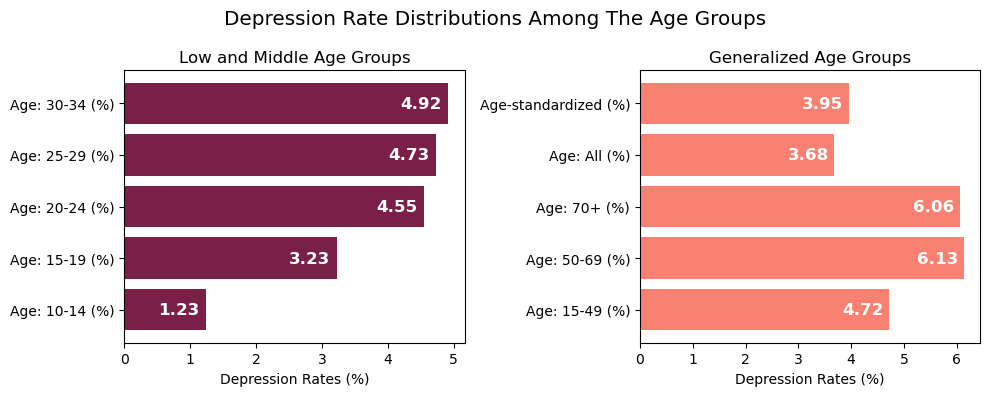

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4), dpi=100)

depression_means = depression_age.iloc[:,1:].mean()

fig.suptitle("Depression Rate Distributions Among The Age Groups",fontsize="x-large")
ax[0].barh(depression_means[1:6].index, depression_means[1:6].values,color="#7a2048")
ax[0].set_title("Low and Middle Age Groups");
ax[0].set_xlabel("Depression Rates (%)")

for index, value in enumerate(depression_means[1:6]):
    ax[0].text(value-0.1, index,round(value,2), ha="right",va="center",weight="bold", color="white",fontsize="large")

ax[1].barh(depression_means[6:].index, depression_means[6:].values,color="salmon")
ax[1].set_title("Generalized Age Groups")
ax[1].set_xlabel("Depression Rates (%)")

for index, value in enumerate(depression_means[6:]):
    ax[1].text(value-0.1, index,round(value,2), ha="right",va="center",weight="bold", color="white",fontsize="large")

plt.tight_layout()

- Middle and high age groups have greater depression rates compared with low age groups
- Moreover, high age groups have greater rates than middle age groups

### 2) Which countries have the most  and the least depression rates

In [17]:
# grouping by country and sorting according to the age-standardized column
top_depressions = depression_age.groupby("Entity").mean().sort_values(by="Age-standardized (%)", ascending=False)
top_depressions.head()

,Year,Age: 10-14 (%),Age: 15-19 (%),Age: 20-24 (%),Age: 25-29 (%),Age: 30-34 (%),Age: 15-49 (%),Age: 50-69 (%),Age: 70+ (%),Age: All (%),Age-standardized (%)
Entity,,,,,,,,,,,
Uganda,2004.5,1.876000,5.825333,8.393000,8.429667,8.513000,8.070667,12.182333,13.495333,4.729667,7.206333
Palestine,2004.5,2.619000,6.337667,8.367000,8.617667,8.997333,8.498667,10.483667,8.085000,5.492333,6.991000
Greenland,2004.5,3.144667,9.648667,13.146333,11.582333,10.131333,10.017667,6.023667,4.111667,7.177333,6.825333
Central African Republic,2004.5,1.188000,4.521667,7.747667,8.255000,8.543333,7.553667,8.911667,9.350000,4.553000,6.023000
Equatorial Guinea,2004.5,1.182333,4.384667,7.446000,7.962667,8.301667,7.207000,8.750667,9.286667,4.188000,5.918333


#### Plotting the most and the least depressed countries

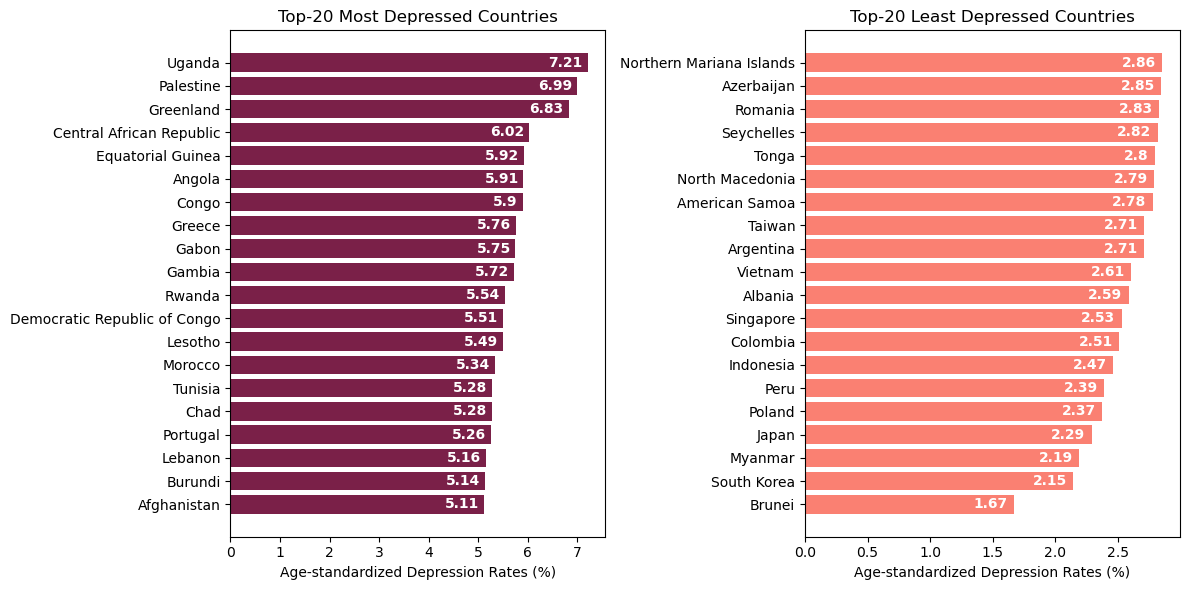

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),dpi=100)

top_countries = top_depressions.head(20).index[::-1]
top_rates = top_depressions.head(20)["Age-standardized (%)"][::-1]

ax[0].barh(top_countries, top_rates, color="#7a2048")
ax[0].set_title("Top-20 Most Depressed Countries")
ax[0].set_xlabel("Age-standardized Depression Rates (%)")

for index, value in enumerate(top_rates):
    ax[0].text(value-0.1, index,round(value,2), ha="right",va="center",weight="bold", color="white")
    
low_countries = top_depressions.tail(20).index[::-1]
low_rates = top_depressions.tail(20)["Age-standardized (%)"][::-1]

ax[1].barh(low_countries, low_rates, color="salmon")
ax[1].set_title("Top-20 Least Depressed Countries")
ax[1].set_xlabel("Age-standardized Depression Rates (%)")

for index, value in enumerate(low_rates):
    ax[1].text(value-0.05, index,round(value,2), ha="right",va="center",weight="bold", color="white")
    
plt.tight_layout()

### 3) Is there a correlation between depression and other mental diseases?

In [19]:
corr_df = pd.DataFrame()
corr_df["Total Depression Rate"] = (df[df.columns[2]] + df[df.columns[3]]) / 2
corr_df["Total Anxiety Rate"] = (df[df.columns[4]] + df[df.columns[5]]) / 2
corr_df["Total Schizophrenia Rate"] = (df[df.columns[6]] + df[df.columns[7]]) / 2
corr_df["Total Bipolar Rate"] = (df[df.columns[8]] + df[df.columns[9]]) / 2
corr_df.corr()

,Total Depression Rate,Total Anxiety Rate,Total Schizophrenia Rate,Total Bipolar Rate
Total Depression Rate,1.000000,0.171037,-0.359080,0.206641
Total Anxiety Rate,0.171037,1.000000,0.394564,0.616802
Total Schizophrenia Rate,-0.359080,0.394564,1.000000,0.200288
Total Bipolar Rate,0.206641,0.616802,0.200288,1.000000


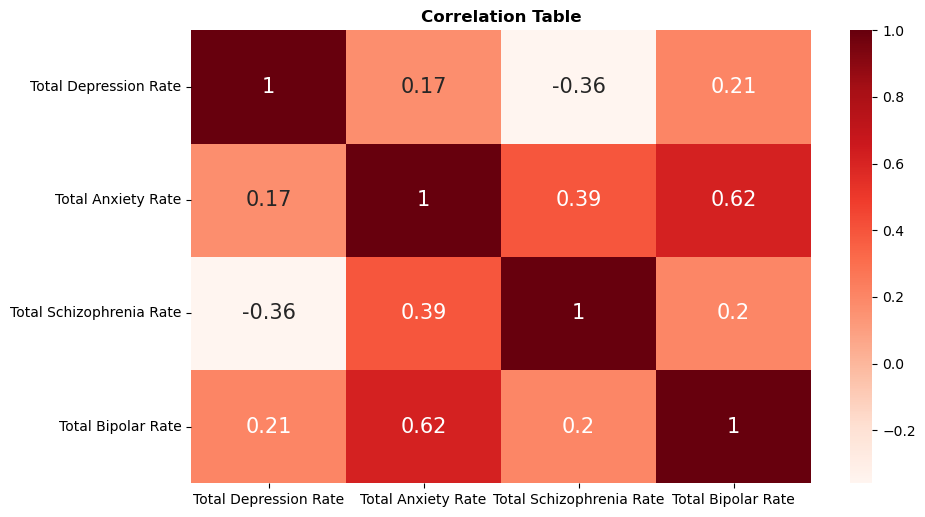

In [20]:
plt.figure(figsize=(10,6),dpi=100)
plt.title("Correlation Table", fontweight= "bold")
sns.heatmap(corr_df.corr(), cmap="Reds", annot=True, annot_kws={"size":15})
plt.show()

- Schizophrenia and Depression have negative correlation $-0.36$
- Bipolar and Depression have positive correlation $0.21$
- Bipolar disorder and Antiexty have a strong correlation $0.62$

### 4) Is there a relation between countries’ development levels and depression rate?

#### Creating useful features

- Chose 5 samples from both developed and under developed country
- The decision of the country development is made from: https://www.un.org/development/desa/dpad/wp-content/uploads/sites/45/WESP2022_ANNEX.pdf

In [21]:
developed_countries = ["Finland","England", "Canada", "Denmark", "Germany"]
under_developed_countries = ["Afghanistan", "Chad", "Guyana", "Zambia", "Guinea"]

gender_comp_developed = df[df["Entity"].isin(developed_countries)][["Year","Entity" ,"Male Depression (%)","Female Depression (%)", "Population"]]
gender_comp_developed["Total Depression (%)"] = (gender_comp_developed["Male Depression (%)"] + gender_comp_developed["Female Depression (%)"])/2

gender_comp_under = df[df["Entity"].isin(under_developed_countries)][["Year","Male Depression (%)","Female Depression (%)"]]
gender_comp_under["Total Depression (%)"] = (gender_comp_under["Male Depression (%)"] + gender_comp_under["Female Depression (%)"])/2

gender_comp_developed = gender_comp_developed.groupby("Year", as_index= False).mean()
gender_comp_under = gender_comp_under.groupby("Year", as_index= False).mean()

#### Plotting developed and under developed country depression rates

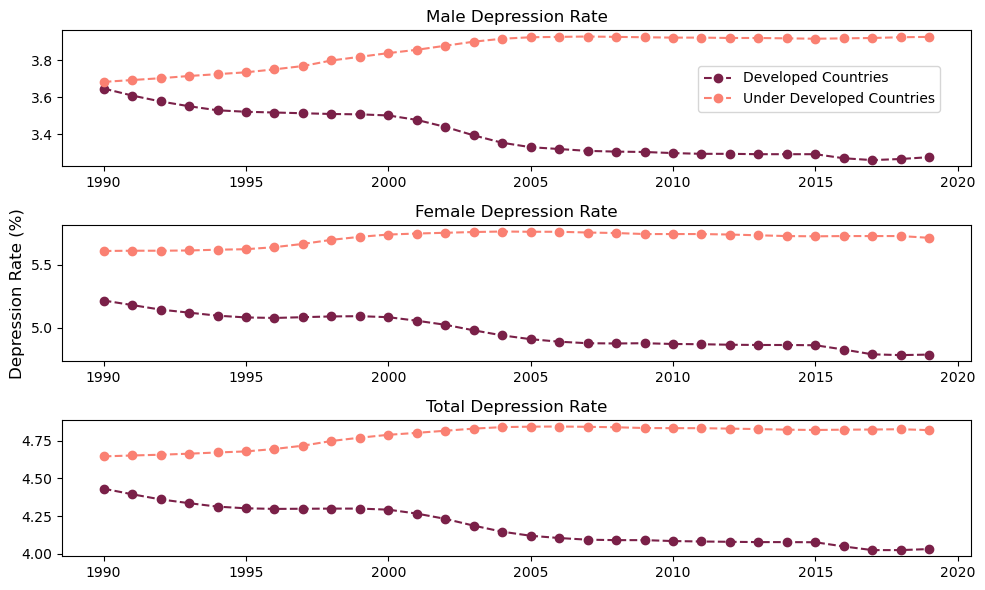

In [22]:
fig, ax = plt.subplots(3,1, figsize = (10,6),dpi=100)

ax[0].plot(gender_comp_developed["Year"],gender_comp_developed["Male Depression (%)"],
           linestyle="--", marker ="o",color="#7a2048", label="Developed Countries")
ax[0].plot(gender_comp_under["Year"],gender_comp_under["Male Depression (%)"],
           linestyle = "--", marker ="o", color="salmon", label="Under Developed Countries")
ax[0].set_title("Male Depression Rate")
ax[0].legend(loc=(0.7,0.4))


ax[1].plot(gender_comp_developed["Year"],gender_comp_developed["Female Depression (%)"],
           linestyle="--", marker ="o",color="#7a2048", label="Developed Countries")
ax[1].plot(gender_comp_under["Year"],gender_comp_under["Female Depression (%)"],
           linestyle = "--", marker ="o", color="salmon", label="Under Developed Countries")
ax[1].set_title("Female Depression Rate")
ax[1].set_ylabel("Depression Rate (%)",fontsize="large")



ax[2].plot(gender_comp_developed["Year"],gender_comp_developed["Total Depression (%)"],
           linestyle="--", marker ="o",color="#7a2048", label="Developed Countries")
ax[2].plot(gender_comp_under["Year"],gender_comp_under["Total Depression (%)"],
           linestyle = "--", marker ="o", color="salmon", label="Under Developed Countries")
ax[2].set_title("Total Depression Rate")


plt.tight_layout()

- Depression rates are lower in the developed countries
- Throughout the years, the difference become more visible

### 5) Is there an increase in depression throughout the years?

- We will look from the perspective of Turkey and the World

In [23]:
turkey = df[df.Entity=="Turkey"]
turkey_rates = turkey.groupby("Year").mean()
yearwise_rates = df.groupby("Year").mean()

- Plotting the depression rates throughout the years

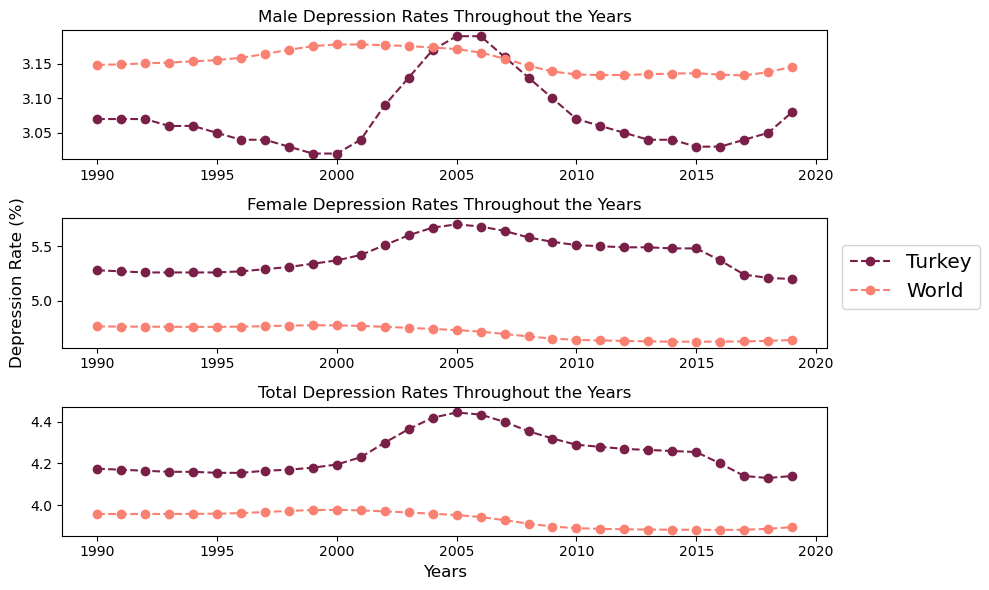

In [24]:
fig, ax = plt.subplots(nrows=3,figsize=(10,6),dpi=100)
tr_total_depression = (turkey_rates["Male Depression (%)"] + turkey_rates["Female Depression (%)"])/2
world_total_depression = (yearwise_rates["Male Depression (%)"] + yearwise_rates["Female Depression (%)"])/2

ax[0].plot(turkey_rates.index,turkey_rates["Male Depression (%)"],linestyle = "--", marker ="o", color="#7a2048")
ax[0].plot(yearwise_rates.index,yearwise_rates["Male Depression (%)"],linestyle = "--", marker ="o", color="salmon")
ax[0].set_title("Male Depression Rates Throughout the Years")

ax[1].plot(turkey_rates.index,turkey_rates["Female Depression (%)"],linestyle = "--", marker ="o", color="#7a2048")
ax[1].plot(yearwise_rates.index,yearwise_rates["Female Depression (%)"],linestyle = "--", marker ="o", color="salmon")
ax[1].set_title("Female Depression Rates Throughout the Years")
ax[1].set_ylabel("Depression Rate (%)",fontsize="large")

ax[1].legend(labels=["Turkey","World"],loc=(1.02,0.3),fontsize="x-large")

ax[2].plot(turkey_rates.index,tr_total_depression,linestyle = "--", marker ="o", color="#7a2048")
ax[2].plot(yearwise_rates.index,world_total_depression,linestyle = "--", marker ="o", color="salmon")
ax[2].set_title("Total Depression Rates Throughout the Years")
ax[2].set_xlabel("Years",fontsize="large")

plt.tight_layout()

### 6) Does an increase in rate of depression of a country cause an increase in the suicide rate of a country?

#### Processing suicide dataset

In [25]:
suicide = suicide.dropna(subset=["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Rate)"]).reset_index()
del suicide["index"]
suicide = suicide.drop(columns=["Continent","Code"])

In [26]:
suicide = suicide.rename(columns={"Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)":"# of Suicides (per 100.000)",
                        "Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Rate)":"# of Depressive Disorders (per 100.000)",
                        "Population (historical estimates)":"Population"})

In [27]:
suicide["# of Suicides (per 100.000)"] = suicide["# of Suicides (per 100.000)"]/1000
suicide["# of Depressive Disorders (per 100.000)"] = suicide["# of Depressive Disorders (per 100.000)"]/1000

In [28]:
suicide = suicide.rename(columns={"# of Suicides (per 100.000)":"Suicide Rates (%)",
                        "# of Depressive Disorders (per 100.000)":"Depression Rates (%)"})

#### Final look of the suicide dataset

In [29]:
suicide.sample(5)

,Entity,Year,Suicide Rates (%),Depression Rates (%),Population
4870,Russia,2000,0.04346,3.27779,146844848.0
993,Canada,1993,0.01374,3.35109,28668168.0
6396,Uruguay,1996,0.01344,2.51709,3226635.0
5434,South Africa,1994,0.02024,4.12682,43267980.0
6338,United States,1998,0.01116,4.43904,275835008.0


#### Plotting the relation of depression and suicide rates

In [30]:
suicide_country_means = suicide.groupby("Entity").mean()

- We are going to plot the scatter-plot according to the average rates throughout the years

In [31]:
suicide_country_means.sample(5)

,Year,Suicide Rates (%),Depression Rates (%),Population
Entity,,,,
Jordan,2004.5,0.003493,4.335670,6.315561e+06
Cape Verde,2004.5,0.016386,4.878200,4.814887e+05
Scotland,2004.5,0.011976,3.969173,NaN
Spain,2004.5,0.006537,4.096359,4.325438e+07
Burkina Faso,2004.5,0.013147,4.369421,1.414950e+07


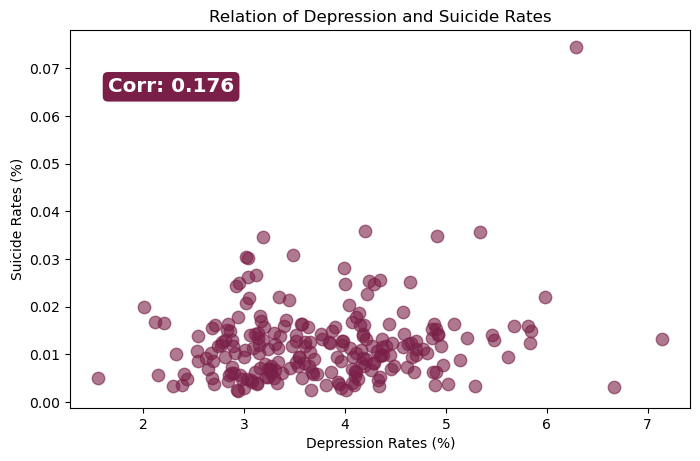

In [32]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(suicide_country_means["Depression Rates (%)"],suicide_country_means["Suicide Rates (%)"]
            ,alpha=0.6,s=80, color="#7a2048");
plt.title("Relation of Depression and Suicide Rates")
plt.xlabel("Depression Rates (%)")
plt.ylabel("Suicide Rates (%)")
plt.text(1.65,0.065,f"Corr: {suicide_country_means.corr()['Depression Rates (%)']['Suicide Rates (%)'].round(3)}",
         bbox=dict(boxstyle="round",ec=(1, 1, 1), color="#7a2048"),fontsize="x-large",color="white",weight="bold");

- We can see that there is some correlation, but it is not that strong

# Hypothesis Testing

### Are women more prone to be depressed than men?

In [33]:
female_depression = df.groupby("Entity").mean()["Female Depression (%)"]
male_depression = df.groupby("Entity").mean()["Male Depression (%)"]

In [34]:
male_vs_female = pd.DataFrame([female_depression.describe(),male_depression.describe()]).T
male_vs_female["Difference"] = abs(female_depression.describe() - male_depression.describe())

#### First look to the female and male depression

In [35]:
male_vs_female

,Female Depression (%),Male Depression (%),Difference
count,228.000000,228.000000,0.000000
mean,4.709458,3.153406,1.556051
std,1.097817,0.796672,0.301145
min,2.013000,1.327667,0.685333
25%,3.864500,2.617333,1.247167
50%,4.745333,3.043333,1.702000
75%,5.420833,3.619917,1.800917
max,8.584667,6.723333,1.861333


#### Scipy T-test

In [36]:
ttest=stats.ttest_ind(female_depression,male_depression)
ttest

Ttest_indResult(statistic=17.32190477451472, pvalue=5.67419913569365e-52)

In [37]:
ttest.pvalue

5.67419913569365e-52

- Really low p-value suggesting female and male distributions differ

#### Scipy One-tail Test

In [38]:
one_tail_test = stats.ttest_ind(female_depression,male_depression,alternative="greater")
one_tail_test

Ttest_indResult(statistic=17.32190477451472, pvalue=2.837099567846825e-52)

In [39]:
one_tail_test.pvalue

2.837099567846825e-52

- Really low p-value suggesting females are more prone than males to be depressed

#### Visualizing the distributions for further understanding

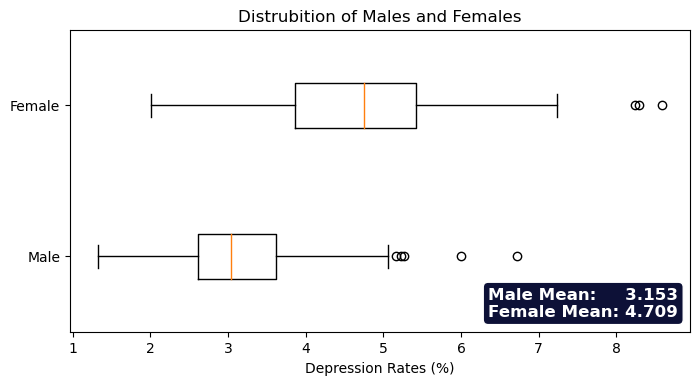

In [40]:
plt.figure(figsize=(8,4),dpi=100)
plt.boxplot(df.groupby("Entity").mean()[["Male Depression (%)","Female Depression (%)"]],vert=False,widths=.3)
plt.title("Distrubition of Males and Females")
plt.yticks(ticks=[1,2],labels=["Male","Female"])
plt.xlabel("Depression Rates (%)")

plt.text(6.35,0.6,f"Male Mean:     {df['Male Depression (%)'].mean():.3f}\nFemale Mean: {df['Female Depression (%)'].mean():.3f}",
         bbox=dict(boxstyle="round",ec=(1, 1, 1), color="#0d1137"),fontsize="large",color="white",weight="bold");

plt.show()

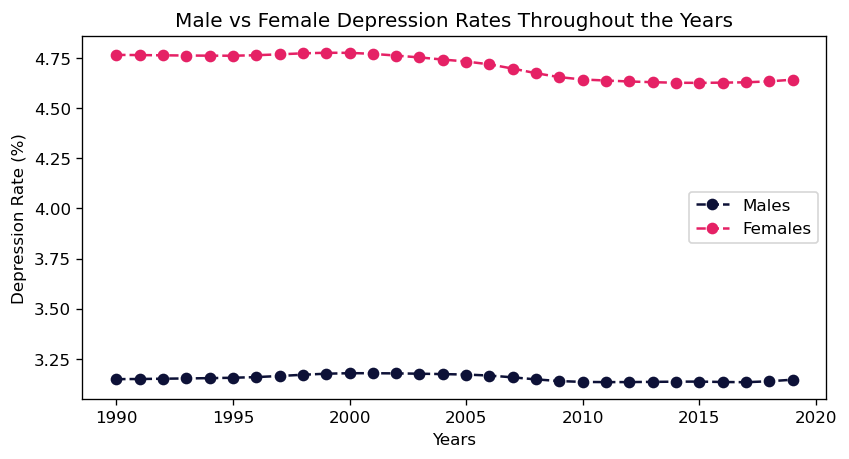

In [41]:
yearwise_rates = df.groupby("Year").mean()

plt.figure(figsize=(8,4),dpi=120)

plt.plot(yearwise_rates.index,yearwise_rates["Male Depression (%)"],
         linestyle = "--", marker ="o", color="#0d1137", label="Males")
plt.plot(yearwise_rates.index,yearwise_rates["Female Depression (%)"],
         linestyle = "--", marker ="o", color="#e52165",label="Females")
plt.title("Male vs Female Depression Rates Throughout the Years")
plt.xlabel("Years")
plt.ylabel("Depression Rate (%)")
plt.legend()

plt.show()

# Further Possible Research Topics

- Is it possible to predict the future depression rates?
- Is it possible to predict a country’s depression rate from other rates?
- Is it possible to predict the development level of the country according to the depression rate ?